In [24]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
from __future__ import print_function
import keras
import os
import sys
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model

sys.path.append('..')
from utils import display_examples, RotNetDataGenerator, angle_error
from data.street_view import get_filenames

di=os.getcwd()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load file names

In [25]:
test_examples_path = os.path.join(di+"/Original")
test_filenames = [os.path.join(test_examples_path, f) for f in os.listdir(test_examples_path)]
print(test_filenames)
print(len(test_filenames))

['/home/aman/RLab/RotNet_Notebook/test/Original/130314052414-pkg-boulden-google-street-view-00020217-horizontal-large-gallery.jpg']
1


## Load model

In [26]:
model_location = os.path.join('rotnet_street_view_resnet50_keras2.hdf5')
model = load_model(model_location, custom_objects={'angle_error': angle_error})
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[angle_error])

/home/aman/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Evaluate model

In [27]:
batch_size = 64
out = model.evaluate_generator(
    RotNetDataGenerator(
        test_filenames,
        input_shape=(224, 224, 3),
        batch_size=batch_size,
        preprocess_func= preprocess_input,
        crop_center=False,       
        crop_largest_rect=False,
        shuffle=True
    ),
    steps=len(test_filenames) / batch_size
)
print('Test loss:', out[0])
print('Test angle error:', out[1])

Test loss: 2.566352605819702
Test angle error: 1.0


## Display examples

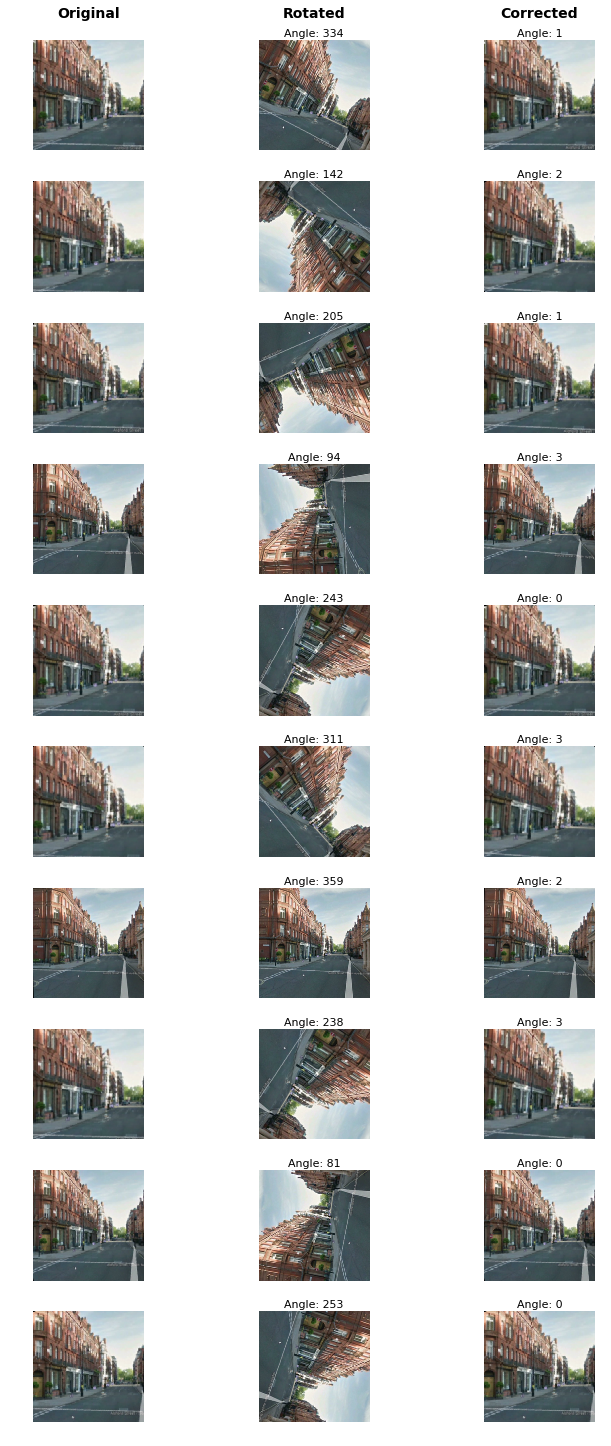

In [28]:
num_images = 10

display_examples(
    model, 
    test_filenames,
    num_images=num_images,
    size=(224, 224),
    crop_center=True,
    crop_largest_rect=True,
    preprocess_func=preprocess_input,
    save_path=None,
    m_dir=di
)